DATA PRE-PROCESSING

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [8]:
# Cargamos el dataframe con los datos del .data
df_boston = pd.read_csv('data//housing.data', delim_whitespace = True, header = None)
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [9]:
# Establecemos las variables que vamos a comparar
x = df_boston[['LSTAT']].values # Variable predictora
y = df_boston[['MEDV']].values # Variable objetivo a predecir
y = y.ravel()

Text(0, 0.5, 'MEDV')

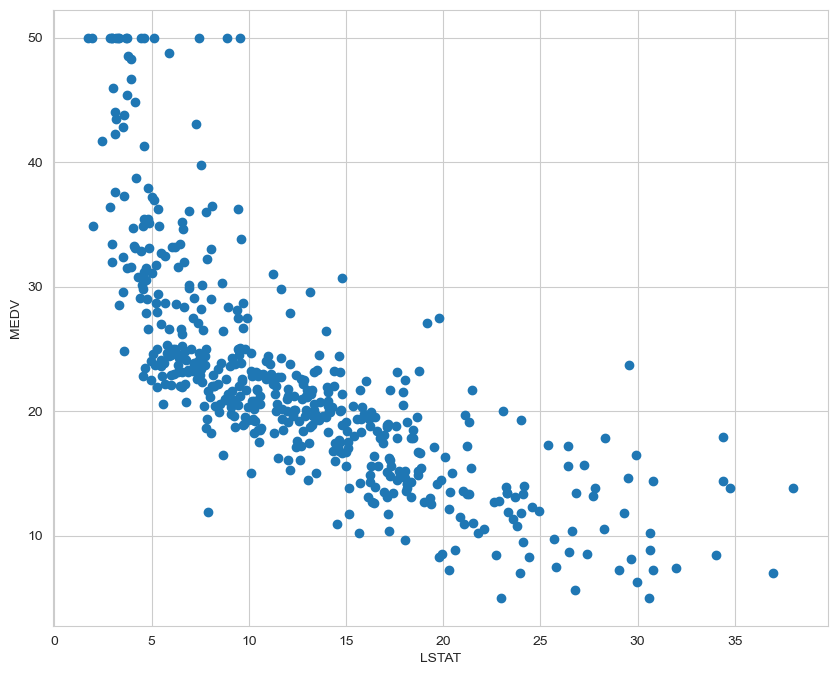

In [10]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y)

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

SIN PRE-PROCESSING

x.shape       = (506, 1)
w_.shape      = (2,)
errors.shape  = (506,)
grad.shape    = (1,)


Text(0, 0.5, 'SSE')

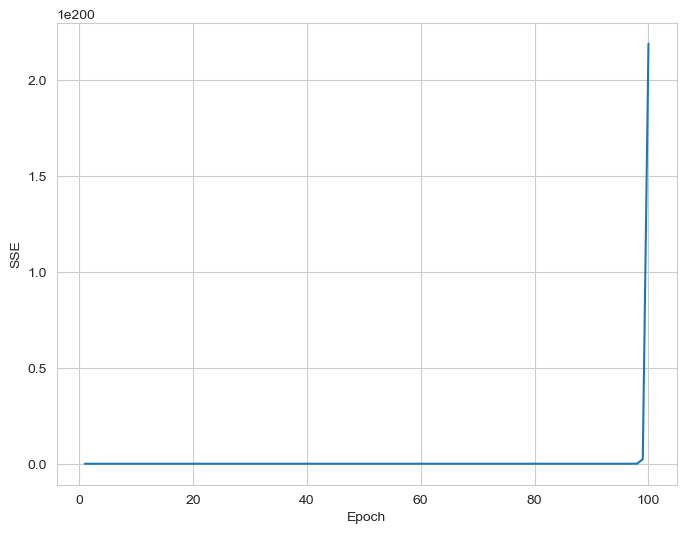

In [14]:
# Descenso por gradiente para ajustar un modelo de regresión lineal simple (o múltiple) y
    # va registrando cómo evoluciona el error (la suma de cuadrados de los errores) a lo largo de las iteraciones

# Tamaño del paso que damos en cada iteracion
alpha = 0.0001
# Creamos un array inicializado a 0 con la cantidad de elementos de x + 1.
w_ = np.zeros(1 + x.shape[1])
# Almacena como evoluciona el precio
cost_ = []
# Numero de veces que repetimos la actualizacion
n_ = 100

for i in range (n_):
    # Prediccion
    # Multiplica cada fila de x por el coeficiente correspondiente almacenado en w_ y luego suma una base almacenada en w_[0]
    y_pred = np.dot(x, w_[1:]) + w_[0]
    # Predice cuanto se equivoco el modelo
    errors = (y - y_pred)

    # Punto de ajuste de los coeficientes y del valor fijo
    # Giramos la tabla (filas son colum y colum son filas) y obtenemos cuanto contribuyo cada variable al error y multiplicamos por el paso que establecimos antes
    w_[1:] += alpha * x.T.dot(errors)
    # Aqui modificamos la base, haciendo uso de la sumatoria de los errores para que se ajuste
    w_[0] += alpha * errors.sum()

    # Calculo del coste
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

plt.figure(figsize = (8, 6))
plt.plot(range(1, n_ + 1), cost_)

plt.xlabel('Epoch')
plt.ylabel('SSE')

En esta gráfica vemos la evolución de la suma de cuadrados de errores (SSE) a lo largo de 100 epochs. En vez de disminuir, el SSE aumenta de manera dramática a partir de cierto número de iteraciones: eso indica que, al no haber escalado ni normalizado las variables, el descenso por gradiente se descontrola y el modelo diverge en lugar de converger.

CON PRE-PROCESSING

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

Text(0, 0.5, 'SSE')

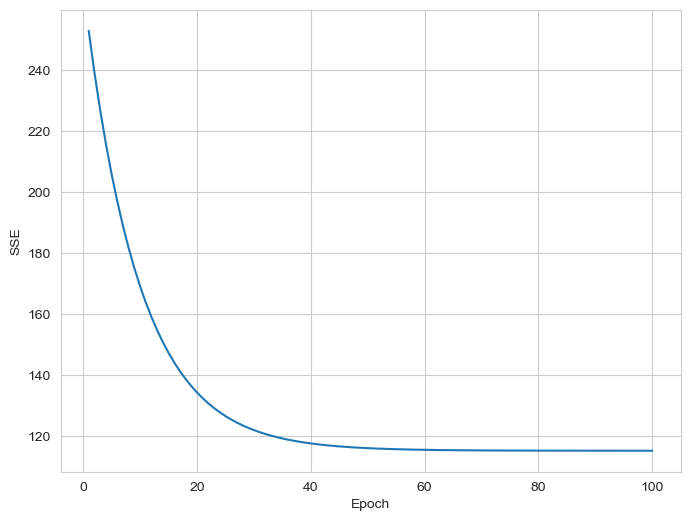

In [21]:
# Descenso por gradiente para ajustar un modelo de regresión lineal simple (o múltiple) y
    # va registrando cómo evoluciona el error (la suma de cuadrados de los errores) a lo largo de las iteraciones

# Tamaño del paso que damos en cada iteracion
alpha = 0.0001
# Creamos un array inicializado a 0 con la cantidad de elementos de x + 1.
w_ = np.zeros(1 + x_std.shape[1])
# Almacena como evoluciona el precio
cost_ = []
# Numero de veces que repetimos la actualizacion
n_ = 100

for i in range (n_):
    # Prediccion
    # Multiplica cada fila de x por el coeficiente correspondiente almacenado en w_ y luego suma una base almacenada en w_[0]
    y_pred = np.dot(x_std, w_[1:]) + w_[0]
    # Predice cuanto se equivoco el modelo
    errors = (y_std - y_pred)

    # Punto de ajuste de los coeficientes y del valor fijo
    # Giramos la tabla (filas son colum y colum son filas) y obtenemos cuanto contribuyo cada variable al error y multiplicamos por el paso que establecimos antes
    w_[1:] += alpha * x_std.T.dot(errors)
    # Aqui modificamos la base, haciendo uso de la sumatoria de los errores para que se ajuste
    w_[0] += alpha * errors.sum()

    # Calculo del coste
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

plt.figure(figsize = (8, 6))
plt.plot(range(1, n_ + 1), cost_)

plt.xlabel('Epoch')
plt.ylabel('SSE')

En esta gráfica mostramos la evolución de la suma de cuadrados de errores (SSE) a lo largo de 100 epochs tras escalar y normalizar los datos. Observamos que el SSE disminuye rápidamente durante las primeras iteraciones y luego se estabiliza en torno a un valor mínimo. Esto indica que, al procesar correctamente las variables (centrado y escalado), el descenso por gradiente converge de forma suave y estable hacia la mejor solución

DATA PREPROCESSING

- Estandarizacion / Eliminación de la media:  Centrar los datos
- Min-Max o Escalado de características a un rango:  Llevar los valores a un rango específico (ej. 0 a 1).
- Normalizacion: Ajustar la escala de cada muestra individual.
- Binarizacion: Convertir valores en 0 o 1 según un umbral.

Supuestos
- Supuesto implícito/explícito de los algoritmos de aprendizaje automático: Las características siguen una distribución normal.
- La mayoría de los métodos se basan en supuestos lineales.
- La mayoría de los algoritmos de aprendizaje automático requieren que los datos estén distribuidos normalmente de forma estándar, es decir, distribución Gaussiana con media cero y varianza unitaria.

scikit-learn:

En la práctica, a menudo ignoramos la forma de la distribución y simplemente transformamos los datos para centrarlos, eliminando el valor medio de cada característica. Luego, se escalan dividiendo las características no constantes por su desviación estándar.

Por ejemplo, muchos elementos utilizados en la función objetivo de un algoritmo de aprendizaje (como el núcleo RBF de las Máquinas de Vectores de Soporte o los regularizadores l1 y l2 de los modelos lineales) asumen que todas las características están centradas alrededor de cero y tienen una varianza del mismo orden. Si una característica tiene una varianza que es órdenes de magnitud mayor que otras, podría dominar la función objetivo y hacer que el estimador no pueda aprender correctamente de las otras características, como se espera.

In [22]:
from sklearn import preprocessing

In [23]:
x_train = np.array([[1., -1., 2.], [2., 0., 0.], [0., 1., -1.]])

In [24]:
# Calcula la media por columna
x_train.mean(axis = 0)

array([1.        , 0.        , 0.33333333])

Estandarización / Eliminación de la media / Escalado de la varianza

scikit Scale

Se elimina la media. Los datos se centran en cero. Esto es para eliminar el sesgo.

La estandarización de conjuntos de datos es un requisito común para muchos estimadores de aprendizaje automático implementados en scikit-learn; podrían comportarse mal si las características individuales no se parecen, en mayor o menor medida, a datos distribuidos normalmente de forma estándar: distribución Gaussiana con media cero y varianza unitaria.
Una "variable aleatoria normal estándar" tiene media 0 y desviación estándar 1.

In [27]:
x_scaled = preprocessing.scale(x_train)
x_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Los datos escalados tienen media cero y varianza unitaria
(Varianza unitaria significa que la varianza = 1):

In [34]:
x_scaled.mean(axis = 0)

array([0., 0., 0.])

In [36]:
x_scaled.std(axis = 0)

array([1., 1., 1.])

Ten en cuenta que si has escalado tus datos de entrenamiento, también debes hacerlo con tus datos de prueba. Sin embargo, tu supuesto es que la media y la varianza deben mantenerse constantes entre tu conjunto de entrenamiento y el de prueba.

scikit-learn ayuda con esto usando una función utilitaria incorporada: StandardScaler.

In [28]:
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler()

In [30]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [31]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [32]:
scaler.transform(x_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

(array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 3 BarContainer objects>)

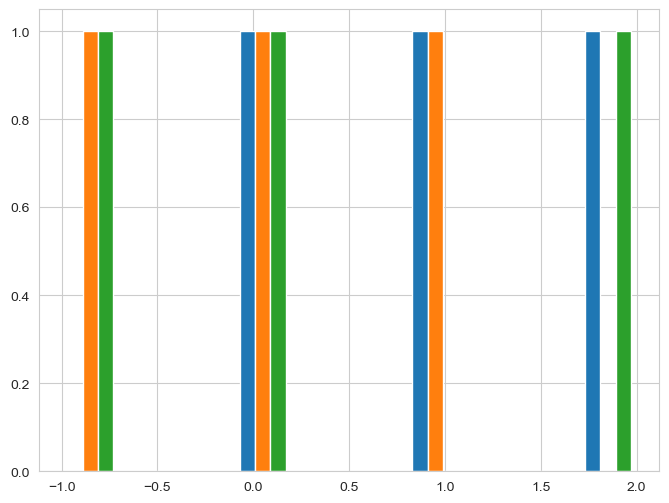

In [37]:
plt.figure(figsize = (8,6))
plt.hist(x_train)

Ahora puedes hacer uso de transform para un nuevo dataset

In [38]:
x_test = [[-1., 1., 0.]]

In [39]:
scaler.transform(x_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

Min-Max o Escalado de Características a un Rango

Objetivo:

Escalar las características para que estén entre un mínimo y un máximo dado, comúnmente entre 0 y 1.
Esto también ayuda a que los datos con desviaciones estándar pequeñas no dominen y preserva los ceros en datos dispersos.

MinMaxScaler

Escala los datos al rango [0 ,1]

In [40]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [41]:
min_max_scaler = preprocessing.MinMaxScaler()

In [42]:
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [43]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

MaxAbsScaler

Escala los datos al rango [−1,1], dividiendo por el valor absoluto máximo de cada característica.
Es ideal para datos ya centrados en 0 o datos dispersos (sparse).

In [44]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [45]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs 

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [46]:
X_test = np.array([[ -1., -0.5,  2.], [0., 0.5, -0.6]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-0.5, -0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

Escalado de Datos Dispersos (Sparse)

Centrar datos dispersos destruiría su estructura. Por eso, rara vez se hace.
Sin embargo, se puede aplicar escalado (sin centrar) si las características están en diferentes escalas.
Para esto, MaxAbsScaler y maxabs_scale son adecuados.

Escalado vs Blanqueamiento (Whitening)
A veces no basta con centrar y escalar las características.
El "whitening" (blanqueamiento) elimina también la correlación entre características.

Para ello, puedes usar:

sklearn.decomposition.PCA(whiten=True); 
sklearn.decomposition.RandomizedPCA(whiten=True)

Esto es útil si tu modelo necesita que las características sean independientes entre sí.

Normalización

La normalización es el proceso de escalar cada muestra individual para que tenga norma unitaria.

Este proceso puede ser útil si planeas usar funciones cuadráticas como el producto punto o cualquier otro kernel para cuantificar la similitud entre pares de muestras.

Este enfoque se basa en el Modelo de Espacio Vectorial, comúnmente usado en clasificación y clustering de textos.

Dos tipos de normalización:

-L1 Normalization: Usa desviaciones absolutas. Garantiza que la suma de los valores absolutos de cada fila sea 1

-L2 Normalization: Usa cuadrados mínimos. Garantiza que la suma de los cuadrados en cada fila sea 1 (norma euclidiana)

In [47]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized   

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

preprocessing.Normalizer es una clase que aplica la misma operación usando la API de tipo Transformer.

In [48]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer()

In [49]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [50]:
normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

Binarización
 
La binarización de características es el proceso de aplicar un umbral a valores numéricos para obtener valores booleanos (0 o 1).
Esto puede ser útil para modelos probabilísticos que asumen que los datos siguen una distribución de Bernoulli multivariada.

También es común en procesamiento de texto usar características binarias (probablemente para simplificar el razonamiento probabilístico), incluso si se tienen frecuencias normalizadas o valores TF-IDF, ya que a veces rinden mejor en la práctica.

In [52]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

Binarizer()

In [53]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [54]:
binarizer = preprocessing.Binarizer(threshold=-0.5)

In [55]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 0.]])

CODIFICACION DE CARACTERISTICAS CATEGORICAS:

consiste en transformar datos categóricos (como 'rojo', 'azul', 'verde', o 'sí', 'no') en un formato numérico que los modelos de machine learning puedan entender.

In [56]:
source = ['australia', 'singapore', 'new zealand', 'hong kong']

In [58]:
label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)

In [59]:
print("country to code mapping:\n") 
for k, v in enumerate(label_enc.classes_): 
    print(v,'\t', k)

country to code mapping:

australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3


In [61]:
test_data = ['hong kong', 'singapore', 'australia', 'new zealand']

In [62]:
result = label_enc.transform(test_data)

In [63]:
print(result)

[1 3 0 2]


CODIFICACION ONE HOT / ONE-OF-K

-Útil para trabajar con matrices dispersas (sparse matrix)
-Utiliza el esquema "one-of-k"

El proceso de convertir una serie de respuestas categóricas en un conjunto de resultados binarios (0 o 1)

In [64]:
source

['australia', 'singapore', 'new zealand', 'hong kong']

In [65]:
src

array([0, 3, 2, 1], dtype=int64)

In [66]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [67]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[0, :])])
print(invert_res)

['australia']


In [68]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[3, :])])
print(invert_res)

['hong kong']
